# VAME tutorial

In [1]:
%load_ext autoreload
%autoreload 2

import vame

Using CUDA
GPU active: True
GPU used: NVIDIA GeForce GTX 1650


/home/vinicius/Documents/work/catalyst/VAME/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# These paths have to be set manually
working_directory = '.'
project = 'my-vame-project'

videos = ['video-1.mp4']
poses_estimations = ['video-1.csv']

# Step 1.1: Initialize your project
config = vame.init_new_project(
    project=project,
    videos=videos,
    poses_estimations=poses_estimations,
    working_directory=working_directory,
    videotype='.mp4'
)

Created "/home/vinicius/Documents/work/catalyst/VAME/examples/my-vame-project-May29-2024/videos"
Created "/home/vinicius/Documents/work/catalyst/VAME/examples/my-vame-project-May29-2024/data"
Created "/home/vinicius/Documents/work/catalyst/VAME/examples/my-vame-project-May29-2024/results"
Created "/home/vinicius/Documents/work/catalyst/VAME/examples/my-vame-project-May29-2024/model"
Copying the videos 

Copying pose estimation files

Copying  video-1.csv  to  /home/vinicius/Documents/work/catalyst/VAME/examples/my-vame-project-May29-2024/videos/pose_estimation/video-1.csv
A VAME project has been created. 

Now its time to prepare your data for VAME. The first step is to move your pose .csv file (e.g. DeepLabCut .csv) into the //YOUR//VAME//PROJECT//videos//pose_estimation folder. From here you can call either the function vame.egocentric_alignment() or if your data is by design egocentric call vame.csv_to_numpy(). This will prepare the data in .csv into the right format to start workin

In [ ]:
# As our config.yaml is sometimes still changing a little due to updates, we have here a small function
# to update your config.yaml to the current state. Be aware that this will overwrite your current config.yaml
# and make sure to back up your version if you did parameter changes!
#vame.update_config(config, force_update=True)

In [3]:
# Step 1.2: Align your behavior videos egocentric and create training dataset
# pose_ref_index: list of reference coordinate indices for alignment
# Example: 0: snout, 1: forehand_left, 2: forehand_right, 3: hindleft, 4: hindright, 5: tail
vame.egocentric_alignment(config, pose_ref_index=[0, 5])

Aligning data video-1, Pose confidence value: 0.99


Align frames: 100%|██████████| 29997/29997 [01:46<00:00, 280.82it/s]


Your data is now ine right format and you can call vame.create_trainset()


In [ ]:
# If your experiment is by design egocentrical (e.g. head-fixed experiment on treadmill etc)
# you can use the following to convert your .csv to a .npy array, ready to train vame on it
# vame.csv_to_numpy(config)

In [4]:
# Step 1.3: create the training set for the VAME model
vame.create_trainset(config, check_parameter=False, pose_ref_index=[0,5])

Creating training dataset...
Using robust setting to eliminate outliers! IQR factor: 4
Creating trainset from the vame.egocentrical_alignment() output 
z-scoring of file video-1
IQR value: 1.05, IQR cutoff: 4.21
Lenght of train data: 26998
Lenght of test data: 2999
A training and test set has been created. Next step: vame.train_model()


In [5]:
# Step 2: Train VAME
vame.train_model(config)

Train Variational Autoencoder - model name: VAME 

Using CUDA
GPU active: True
GPU used:  NVIDIA GeForce GTX 1650
Latent Dimensions: 30, Time window: 30, Batch Size: 256, Beta: 1, lr: 0.0005

Compute mean and std for temporal dataset.
Initialize train data. Datapoints 26998
Initialize test data. Datapoints 2999


/home/vinicius/Documents/work/catalyst/VAME/venv/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Scheduler step size: 100, Scheduler gamma: 0.20

Start training... 


Training Model:   0%|          | 0/9 [00:00<?, ?epoch/s]

Train loss: 17409.827, MSE-Loss: 11020.742, MSE-Future-Loss 6389.085, KL-Loss: 0.000, Kmeans-Loss: 0.000, weight: 0.00


Training Model:  11%|█         | 1/9 [00:12<01:36, 12.07s/epoch]

Test loss: 1200.356, MSE-Loss: 1200.356, KL-Loss: 0.000, Kmeans-Loss: 0.000


Train loss: 6228.676, MSE-Loss: 3620.688, MSE-Future-Loss 2607.988, KL-Loss: 0.000, Kmeans-Loss: 0.000, weight: 0.00


Training Model:  22%|██▏       | 2/9 [00:23<01:20, 11.55s/epoch]

Test loss: 938.445, MSE-Loss: 938.445, KL-Loss: 0.000, Kmeans-Loss: 0.000


Train loss: 5199.869, MSE-Loss: 2914.964, MSE-Future-Loss 2283.431, KL-Loss: 1.085, Kmeans-Loss: 0.390, weight: 0.25


Training Model:  33%|███▎      | 3/9 [00:34<01:08, 11.37s/epoch]

Test loss: 901.612, MSE-Loss: 899.847, KL-Loss: 1.401, Kmeans-Loss: 0.365


Train loss: 4831.666, MSE-Loss: 2654.812, MSE-Future-Loss 2173.688, KL-Loss: 2.367, Kmeans-Loss: 0.799, weight: 0.50


Training Model:  44%|████▍     | 4/9 [00:45<00:56, 11.25s/epoch]

Test loss: 859.533, MSE-Loss: 855.972, KL-Loss: 2.816, Kmeans-Loss: 0.745


Train loss: 4585.811, MSE-Loss: 2482.601, MSE-Future-Loss 2098.540, KL-Loss: 3.467, Kmeans-Loss: 1.203, weight: 0.75


Training Model:  56%|█████▌    | 5/9 [00:56<00:44, 11.19s/epoch]

Test loss: 814.595, MSE-Loss: 809.489, KL-Loss: 4.007, Kmeans-Loss: 1.100


Train loss: 4305.202, MSE-Loss: 2276.049, MSE-Future-Loss 2022.777, KL-Loss: 4.765, Kmeans-Loss: 1.611, weight: 1.00


Training Model:  67%|██████▋   | 6/9 [01:07<00:33, 11.19s/epoch]

Test loss: 796.054, MSE-Loss: 789.055, KL-Loss: 5.515, Kmeans-Loss: 1.485
Saving model!


Train loss: 4117.111, MSE-Loss: 2141.173, MSE-Future-Loss 1969.499, KL-Loss: 4.817, Kmeans-Loss: 1.623, weight: 1.00


Training Model:  78%|███████▊  | 7/9 [01:18<00:22, 11.17s/epoch]

Test loss: 744.332, MSE-Loss: 737.325, KL-Loss: 5.496, Kmeans-Loss: 1.511
Saving model!


Train loss: 3857.302, MSE-Loss: 1956.798, MSE-Future-Loss 1893.912, KL-Loss: 4.914, Kmeans-Loss: 1.677, weight: 1.00


Training Model:  89%|████████▉ | 8/9 [01:30<00:11, 11.19s/epoch]

Test loss: 641.999, MSE-Loss: 634.622, KL-Loss: 5.716, Kmeans-Loss: 1.661
Saving model!


Train loss: 3488.639, MSE-Loss: 1688.840, MSE-Future-Loss 1792.785, KL-Loss: 5.202, Kmeans-Loss: 1.812, weight: 1.00


Training Model: 100%|██████████| 9/9 [01:41<00:00, 11.26s/epoch]

Test loss: 480.565, MSE-Loss: 472.748, KL-Loss: 5.964, Kmeans-Loss: 1.852
Saving model!


Finished training...
Model seems to have not reached convergence. You may want to check your model 
with vame.evaluate_model(). If your satisfied you can continue. 
Use vame.pose_segmentation() to identify behavioral motifs! 
OPTIONAL: You can re-run vame.train_model() to improve performance.


Using CUDA
GPU active: True
GPU used: NVIDIA GeForce GTX 1650


Evaluation of VAME model. 

Initialize test data. Datapoints 2999
You can find the results of the evaluation in '/Your-VAME-Project-Apr30-2020/model/evaluate/' 
OPTIONS:
- vame.pose_segmentation() to identify behavioral motifs.
- re-run the model for further fine tuning. Check again with vame.evaluate_model()


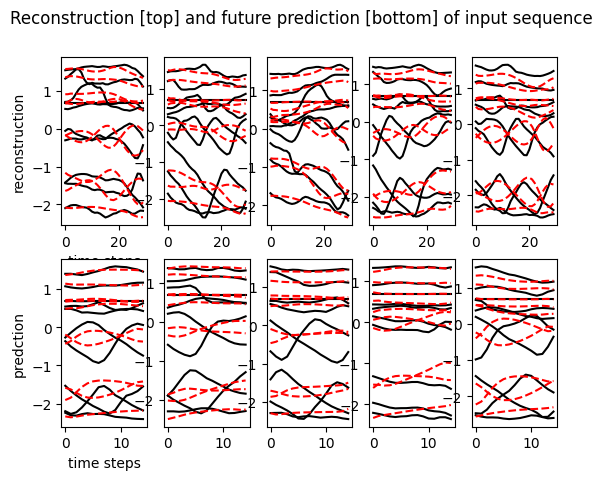

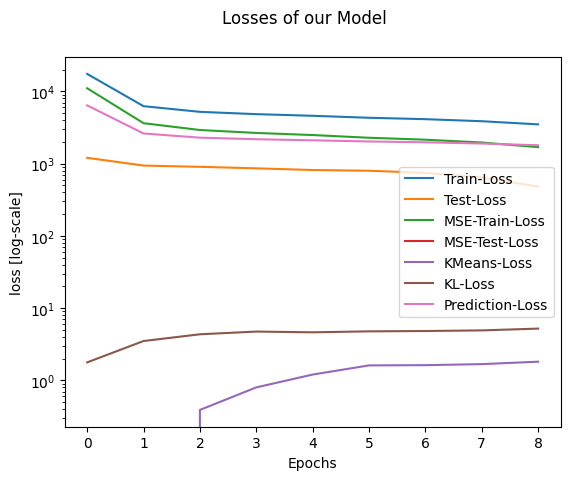

In [6]:
# Step 3: Evaluate model
vame.evaluate_model(config)

In [7]:
# Step 4: Segment motifs/pose
vame.pose_segmentation(config)

Pose segmentation for VAME model: VAME 

Using CUDA
GPU active: True
GPU used: NVIDIA GeForce GTX 1650
Embedding of latent vector for file video-1


100%|██████████| 29967/29967 [00:44<00:00, 679.34it/s]


For all animals the same parametrization of latent vectors is applied for 15 cluster
Using a HMM as parametrization!
/home/vinicius/Documents/work/catalyst/VAME/examples/my-vame-project-May29-2024/results/video-1/VAME/hmm-15/
You succesfully extracted motifs with VAME! From here, you can proceed running vame.motif_videos() 


---
#### The following are optional choices to create motif videos, communities/hierarchies of behavior and community videos

In [8]:
# # OPTIONAL: Create motif videos to get insights about the fine grained poses
vame.motif_videos(config, videoType='.mp4')

Cluster size is: 15 
Motif videos getting created for video-1 ...
Cluster: 0


100%|██████████| 1000/1000 [00:23<00:00, 41.86it/s]


Cluster: 1


100%|██████████| 1000/1000 [00:23<00:00, 42.70it/s]


Cluster: 2


100%|██████████| 1000/1000 [00:23<00:00, 42.73it/s]


Cluster: 3


100%|██████████| 1000/1000 [00:23<00:00, 43.47it/s]


Cluster: 4


100%|██████████| 1000/1000 [00:22<00:00, 43.68it/s]


Cluster: 5


100%|██████████| 1000/1000 [00:25<00:00, 39.42it/s]


Cluster: 6


100%|██████████| 1000/1000 [00:23<00:00, 41.95it/s]


Cluster: 7


100%|██████████| 1000/1000 [00:22<00:00, 44.73it/s]


Cluster: 8


100%|██████████| 1000/1000 [00:23<00:00, 42.74it/s]


Cluster: 9


100%|██████████| 855/855 [00:20<00:00, 42.26it/s]


Cluster: 10


100%|██████████| 1000/1000 [00:22<00:00, 43.77it/s]


Cluster: 11


100%|██████████| 1000/1000 [00:25<00:00, 39.51it/s]


Cluster: 12


100%|██████████| 1000/1000 [00:25<00:00, 39.47it/s]


Cluster: 13


100%|██████████| 1000/1000 [00:23<00:00, 42.11it/s]


Cluster: 14


100%|██████████| 1000/1000 [00:23<00:00, 42.47it/s]

All videos have been created!


In [ ]:
#get_community_labels
# communities_all [[[14, 8, 0, 2, 9], [13, 7, 10], [4, 6, 3, 11, 1], [5, 12]]]
# shape (1, 4, 5)

#---

#get_cohort_community_labels
# communities_all [[[14, 8, 0, 2, 9], [13, 7, 10], [4, 6, 3, 11, 1], [5, 12]]]
# shape (1, 4, 5)


# maybe the problem is in create_cohort_community_bag function that is returning the same shape as create_community_bag ?

Zero motifs:  []
get_cohort_community_labels
communities_all [[[14, 8, 0, 2, 9], [13, 7, 10], [4, 6, 3, 11, 1], [5, 12]]]


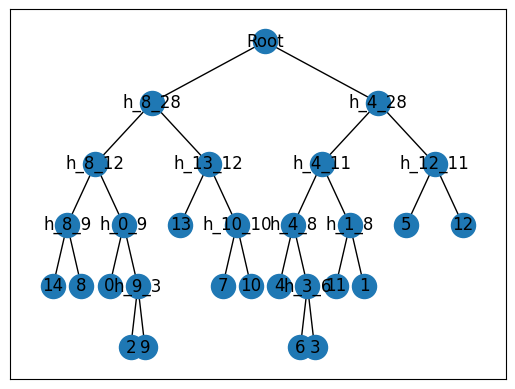

In [13]:
# # OPTIONAL: Create behavioural hierarchies via community detection
vame.community(config, show_umap=False, cut_tree=2, cohort=True)

In [ ]:
# # OPTIONAL: Create community videos to get insights about behavior on a hierarchical scale
vame.community_videos(config)

Visualizing 29967 data points.. 


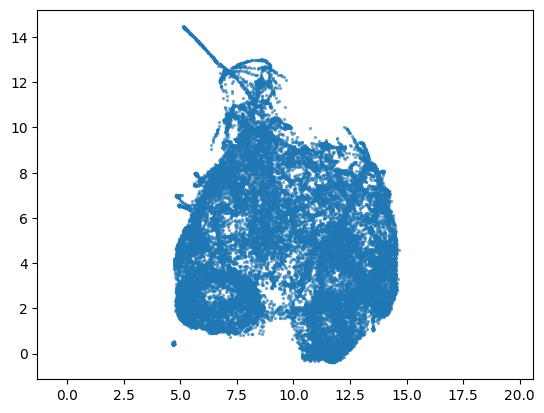

In [11]:
# # OPTIONAL: Down projection of latent vectors and visualization via UMAP
fig = vame.visualization(config, label=None) #options: label: None, "motif", "community"

In [ ]:
# # OPTIONAL: Use the generative model (reconstruction decoder) to sample from
# # the learned data distribution, reconstruct random real samples or visualize
# # the cluster center for validation
vame.generative_model(config, mode="centers") #options: mode: "sampling", "reconstruction", "centers", "motifs"

In [ ]:
# OPTIONAL: Create a video of an egocentrically aligned mouse + path through
# the community space (similar to our gif on github) to learn more about your representation
# and have something cool to show around ;)
# Note: This function is currently very slow. Once the frames are saved you can create a video
# or gif via e.g. ImageJ or other tools
vame.gif(config, pose_ref_index=[0,5], subtract_background=True, start=None,
         length=500, max_lag=30, label='community', file_format='.mp4', crop_size=(300,300))
